 # IMDb Movie Rankings

## Introduction

IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. 
It offers a searchable database of more than 250 million data items including more than 4 million movies, TV and entertainment programs and 8 million cast and crew members. 
IMDb launched online in 1990 and has been a subsidiary of Amazon.com since 1998.(IMDB)

IMDb webite is commonly used for reviewing movies and the following definitions are used by IMDb to rate movies:

    1. Rating: IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. 
               Individual votes are then aggregated and summarized as a single IMDb rating.
    2. Metascore: IMDB collects reviews from various critics, assigns a score to there reviews and then applies a
                  weighted average based on the quality and stature of their reviews

It is also possible to collect data points from the IMDb database on the gross revenue made made by movies, the genre, actors, directors as well as cat members involved with the movie.

Due to the availability of data it is become possible for researchers to investigate and analyse the relationships
between different variables associated with movie performance. As one can imagine it is important for movie studios and investors to investigate these relationships so that they can make predictions on the commercial success of any new movie.

For this project I will investigate a number of different variables researchers believe contribute to movie performance, including gross revenue for historical movies. By comparing ratings, metascores, gross revenue and genre it may be
possible to see a relationship, hence point to a movie genre one should invest in if wanting to achieve successful return on their investment.

I will outline inital research in the area around the determinants of movie performance, derive descriptive statistics from an
IMDb dataset and use these statistics to build a simulated dataset using the variables to follow.

## Previous research review

According to (Pangarker and Smith) from as early as the mid-1960’s analysts, studios, and investors alike have been 
researching which variables contribute to the commercial success of films. In their reseach, they looked at at various
dependant variables and their contribution to global box office revenue. They found that the most significant contributor to
box office revenues was the production cost i.e. the bigger the budget, the more succesful the movie

Research carried out by Litman (1983) viewed ratings, production budget, cast and director as the most important determinants 
of movie performance. Litman went on the model the relationships between revenue (dependant variable) and production cost, 
star rating, and genre (independant variables) using a multiple regression model. 

Liman found that production costs were positively correlated with revenue and critics star ratings was also significant. 

De Vany and Walls (1999) found that it was very difficult to find relationships between variables and that a success of a movie
did not follow the normal distribution. It was more skewed to some very dominant movies whos's success was extremely difficult to
predict. 

Reinstein and Snyder (2000) looked at the power of critics reviews and movie performance and found that only certain critic reviews 
would influence the performance of a movie. 

Research carried out by Ramos (2015) on the data contained in the IMDb database found that production budgets can ensure
better than average box office returns but was not a certainty to deliver better than average returns. In this research Netflix
data was used as a comparison to eliminate bias possibly contained in the IMDb due to 'voter stuffing' i.e. trying to push up a movies rating by asking people to vote.  

Terry (2015) employed correlation models to show relationships between themed horror movies and box office revenue. Terry found
that certain types of themes such as slasher movies were more positibely correlated with box office performance. 

## Project Methodology

In [1]:
%matplotlib inline
# import pandas library; pandas is a library used for data analysis and creating data structures in Python
import pandas as pa
# import numpy library; numpy is a statistical library used for data analysis using Python
import numpy as np

import seaborn as sns

import matplotlib.pyplot as mpl

import scipy.stats as ss

In [2]:
Movie = pa.read_csv("https://raw.githubusercontent.com/donalcarr85/Datasets/master/IMDB-Movie-Data.csv",nrows=100)
Movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [3]:
Movie['New Genre'] = Movie['Genre'].str.split(",").str[0].str.strip()
Movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,New Genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Comedy
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Adventure


In [4]:
Movie = Movie.rename(columns={'Revenue (Millions)':'Revenue_Millions'})

In [5]:
moviedf = Movie.iloc[:,[8,9,10,11,12]]
moviedf

,Rating,Votes,Revenue_Millions,Metascore,New Genre
0,8.1,757074,333.13,76.0,Action
1,7.0,485820,126.46,65.0,Adventure
2,7.3,157606,138.12,62.0,Horror
3,7.2,60545,270.32,59.0,Animation
4,6.2,393727,325.02,40.0,Action
5,6.1,56036,45.13,42.0,Action
6,8.3,258682,151.06,93.0,Comedy
7,6.4,2490,NaN,71.0,Comedy
8,7.1,7188,8.01,78.0,Action
9,7.0,192177,100.01,41.0,Adventure


In [6]:
moviedf.describe()

,Rating,Votes,Revenue_Millions,Metascore
count,100.000000,1.000000e+02,91.000000,94.000000
mean,7.086000,2.673344e+05,157.496044,62.957447
std,1.067615,3.369302e+05,182.794555,16.400180
min,2.700000,2.220000e+02,0.010000,16.000000
25%,6.575000,4.096750e+04,32.160000,53.250000
50%,7.200000,1.308830e+05,100.010000,66.000000
75%,7.900000,3.552535e+05,210.295000,74.000000
max,9.000000,1.791916e+06,936.630000,99.000000


C:\Users\Donal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Donal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


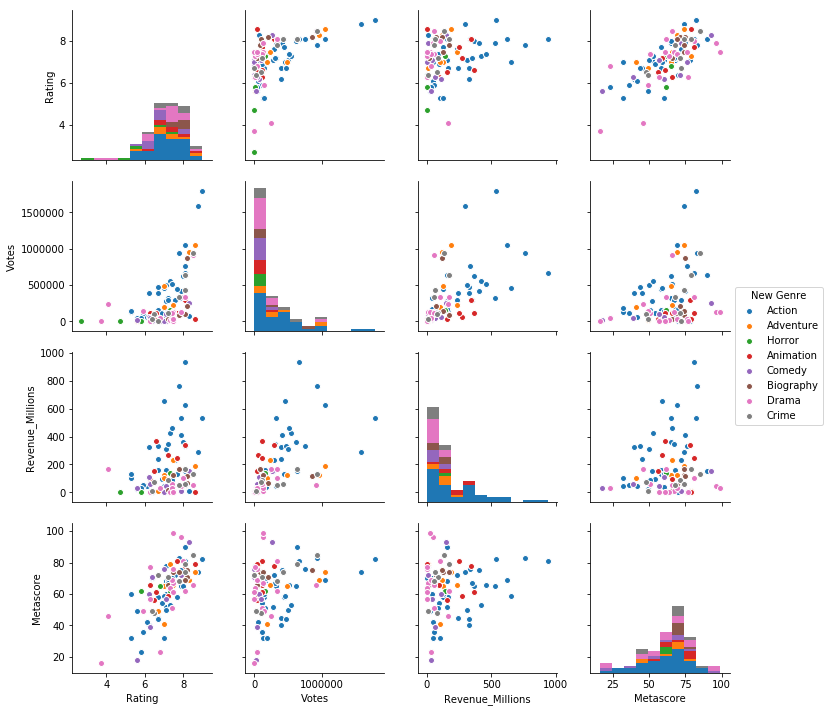

In [7]:
g = sns.pairplot(moviedf, hue="New Genre")

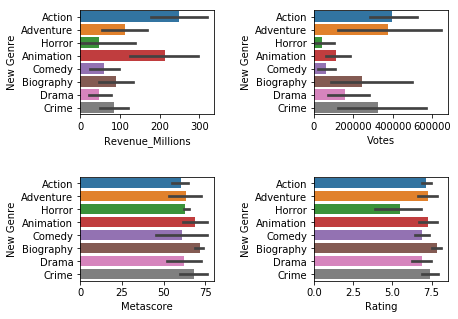

In [8]:
mpl.subplot(2, 2,1)
sns.barplot(x="Revenue_Millions", y="New Genre", data=moviedf)
mpl.subplot(2, 2,2)
sns.barplot(x="Votes", y="New Genre", data=moviedf)
mpl.subplot(2, 2,3)
sns.barplot(x="Metascore", y="New Genre", data=moviedf)
mpl.subplot(2, 2,4)
sns.barplot(x="Rating", y="New Genre", data=moviedf)
mpl.subplots_adjust(top=0.95, bottom=0.01, left=0.1, right=0.95, hspace=0.6,
                    wspace=0.75)

### Rating

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


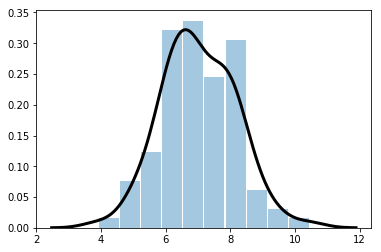

In [9]:
r = np.random.normal(7.086, 1.067, 100)
sns.distplot(r,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Votes

In [10]:
mu, sigma = 179.,33. # mean and standard deviation
s = np.random.lognormal(179.,33., 100)
s

array([1.22385125e+084, 1.32544169e+042, 1.00018293e+092, 2.62522468e+079,
       1.18781674e+076, 1.29135812e+059, 3.97919310e+062, 4.32555555e+077,
       9.39079035e+084, 1.67038243e+069, 4.56515174e+074, 3.57212638e+095,
       2.16607641e+100, 5.37833254e+091, 9.29073018e+068, 1.91932403e+053,
       1.28044769e+075, 4.47937538e+098, 1.63355219e+090, 2.84217298e+084,
       4.44256386e+066, 2.56012685e+062, 1.16500443e+086, 1.67882253e+076,
       5.50071590e+079, 6.04993784e+080, 4.93907666e+055, 3.29910272e+079,
       5.28798383e+092, 7.67539053e+082, 1.35185697e+074, 9.65240618e+083,
       1.49269936e+072, 2.78461744e+074, 2.60041802e+065, 1.43530085e+067,
       7.97361270e+083, 3.00739522e+056, 2.57498290e+090, 4.85796904e+085,
       2.93811867e+080, 1.33502930e+074, 7.58716362e+083, 5.63656795e+054,
       5.39975562e+067, 1.59895285e+083, 1.48662583e+072, 1.50213380e+075,
       4.61260708e+076, 1.37366096e+096, 7.51310191e+064, 4.31899716e+072,
       6.42430133e+074, 7

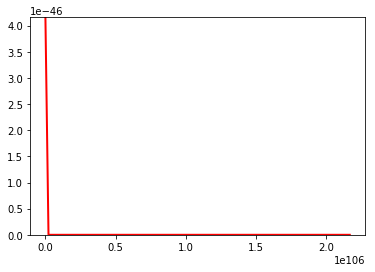

In [11]:
counts, bins, ignored = mpl.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 100)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
mpl.plot(x, pdf, linewidth=2, color='r')
mpl.axis('tight')
mpl.show()

In [12]:
a, m = 3.,2. # shape and mode
s = (np.random.pareto(a, 100) + 1) * m

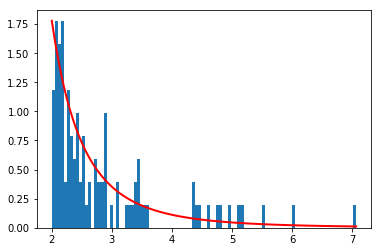

In [13]:
count, bins, _ = mpl.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
mpl.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
mpl.show()

### Revenue

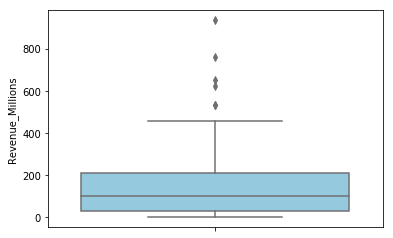

In [14]:
sns.boxplot(y="Revenue_Millions", data=moviedf,color="skyblue")

In [15]:
## https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr ##
q1 = moviedf['Revenue_Millions'].quantile(.25)
q3 = moviedf['Revenue_Millions'].quantile(.75)
mask = moviedf['Revenue_Millions'].between(q1, q3, inclusive=True)
iqr = moviedf.loc[mask, 'Revenue_Millions']

In [16]:
iqr.describe().round()

count     45.0
mean     101.0
std       47.0
min       32.0
25%       55.0
50%      100.0
75%      138.0
max      188.0
Name: Revenue_Millions, dtype: float64

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


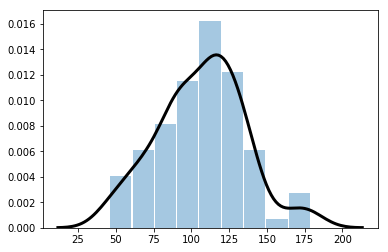

In [17]:
rev = np.random.normal(101,30, 100)
sns.distplot(rev,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Metascore

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


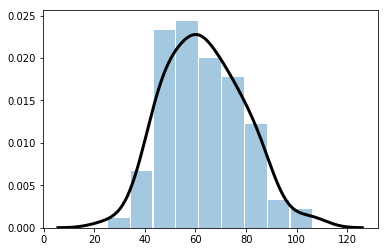

In [18]:
m = np.random.normal(62.95,16.4, 100)
sns.distplot(m,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

## Create Dataframe using simulated data

In [19]:
SimData = pa.DataFrame({
           'Rating': r,
           'Votes': s,
           'Revenue': rev,
           'Metascore': m},
            columns = ['Rating','Votes','Revenue','Metascore'])

In [20]:
SimData.round(0)

,Rating,Votes,Revenue,Metascore
0,7.0,2.0,48.0,66.0
1,7.0,2.0,172.0,41.0
2,8.0,5.0,123.0,88.0
3,7.0,2.0,120.0,68.0
4,7.0,3.0,65.0,25.0
5,8.0,3.0,65.0,58.0
6,6.0,2.0,110.0,93.0
7,6.0,2.0,120.0,57.0
8,8.0,2.0,96.0,47.0
9,9.0,7.0,161.0,35.0


## Relationships

KeyError: 'New Genre'

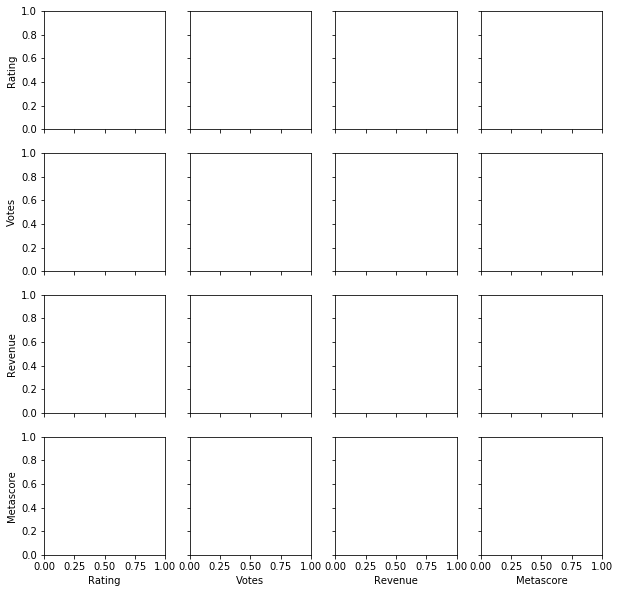

In [24]:
pplot = sns.pairplot(SimData, hue="New Genre")

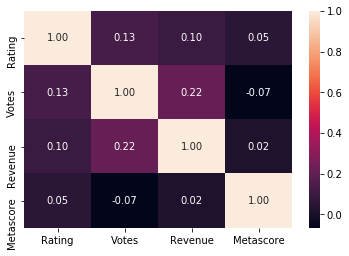

In [23]:
sns.heatmap(SimData.corr(), annot=True, fmt=".2f")

## Bibliography

1. IMDB Website - https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=__seemr#


2. N.A. Pangarker and E.v.d.M. Smit 2013,The determinants of box office performance in the film industry revisited.
   https://pdfs.semanticscholar.org/c960/7aaa7746ec9735a19d0ab2e524e53d20ab7f.pdf

3. Litman, B. 1983. ‘Predicting success of theatrical movies: An empirical study’, Journal of Popular Culture.
   https://www.researchgate.net/publication/229673102_Predicting_Success_of_Theatrical_Movies_An_Empirical_Study

4. De Vany, A. & Walls, W.D. 2002. ‘Does Hollywood make too many R-rated movies? Risk, stochastic dominance, and
the illusion of expectation’Journal of business
   https://www.jstor.org/stable/10.1086/339890?seq=8#metadata_info_tab_contents
   https://www.nytimes.com/2000/03/23/business/economic-scene-golden-formula-for-hollywood-success-it-only-happens-movies.html

5. David A. Reinstein,2000. The Influence of Expert Reviews on Consumer Demand for Experience Goods:
    A Case Study of Movie Critics
    http://ses-perso.telecom-paristech.fr/survey/CanauxInformBienExpe/ReinsteinSnyder2000.pdf

6. Marlon Ramos,Angelo M. Calvão,Celia Anteneodo, 2015 Statistical Patterns in Movie Rating Behavior
   https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4555649/

In [ ]:
7. Neil Terry, The Determinants of Box Office Revenue for Horror Movie
   http://www.jgbm.org/page/28Neil%20Terry%20.pdf 